In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import montage
from IPython.display import display

# Ajuste de visualização
plt.rcParams["figure.figsize"] = (8, 8)

# Caminho das pastas
pasta_entrada = "../dataset_aug"

In [6]:
# Monta uma grid que exibe as imagens de cada class
def show_class_montage(class_name, n_images=16, n_cols=4):
    # Busca direta na pasta da classe
    class_path = os.path.join(pasta_entrada, class_name)
    if not os.path.exists(class_path):
        print(f"(pasta não encontrada para {class_name})")
        return
    
    # Lista todos os arquivos de imagem na pasta
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif']
    files = []
    for file in os.listdir(class_path):
        if any(file.lower().endswith(ext) for ext in image_extensions):
            files.append(os.path.join(class_path, file))
    
    files = files[:n_images]  # Limita ao número de imagens desejado
    imgs = [imread(f) for f in files]
    if not imgs:
        print(f"(nenhuma imagem encontrada para {class_name})")
        return
    n = len(imgs)
    cols = min(n_cols, n)
    rows = math.ceil(n / cols)
    
    grid = montage(imgs, grid_shape=(rows, cols), channel_axis=-1)
    
    plt.imshow(grid)
    plt.axis("off")
    plt.title(f"Classe: {class_name} ({n} imagens exibidas)")
    plt.show()

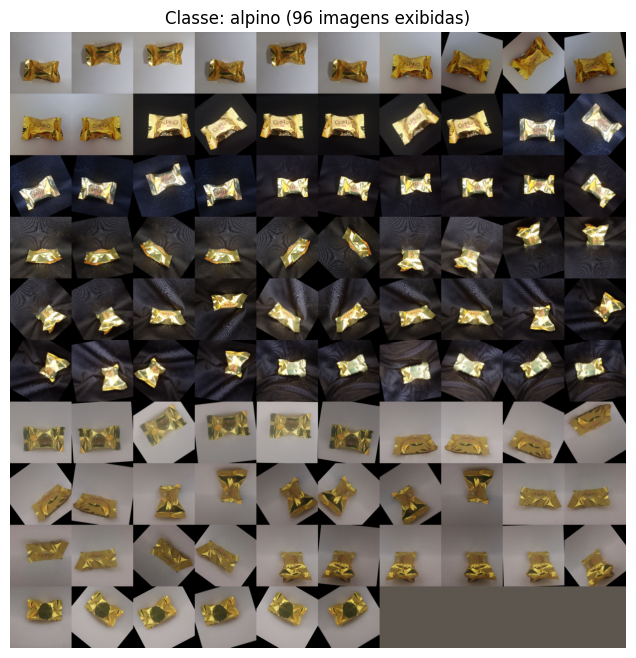

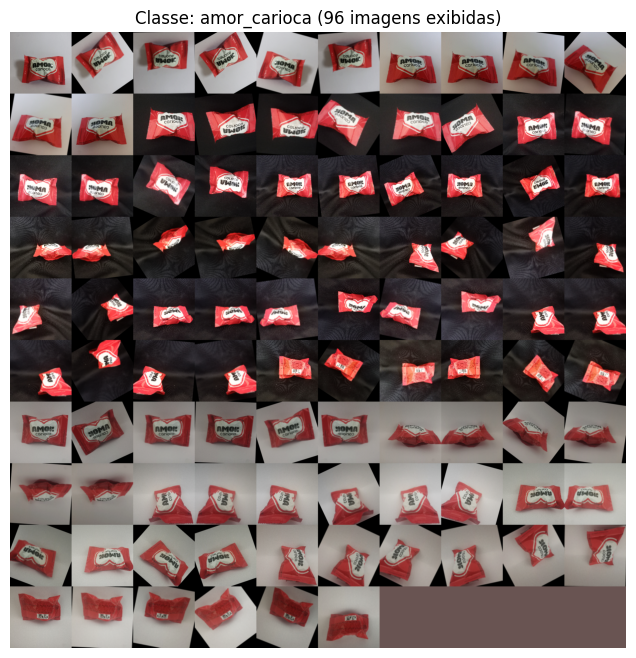

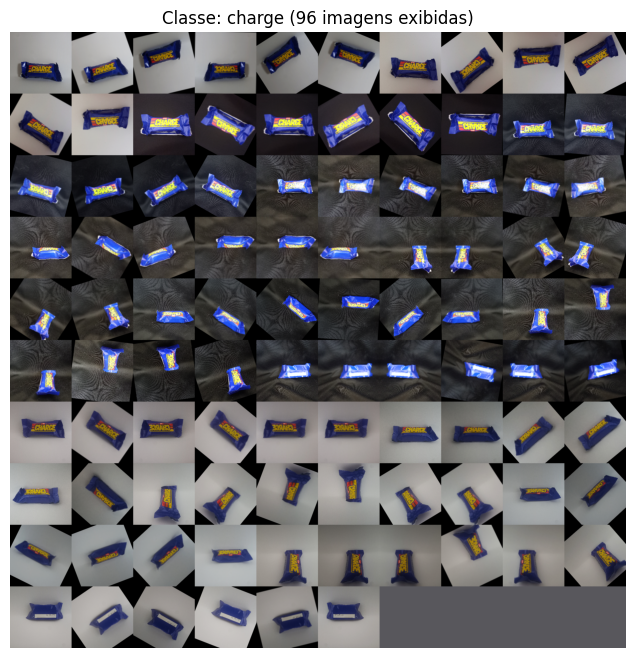

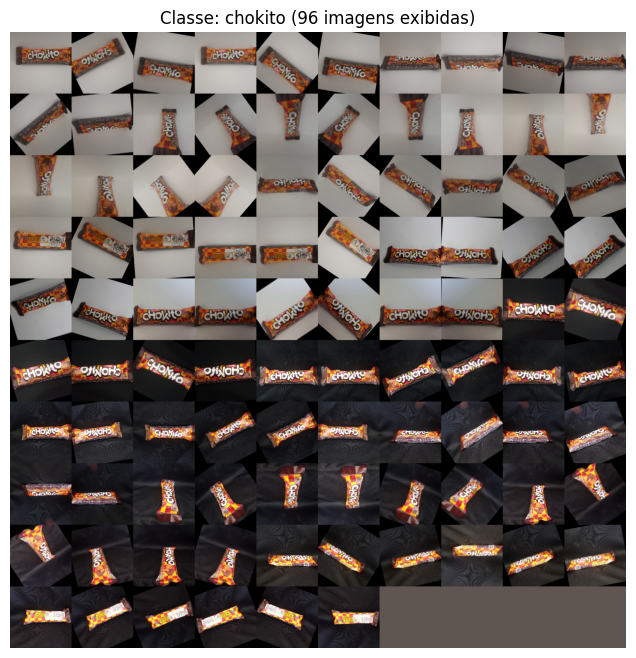

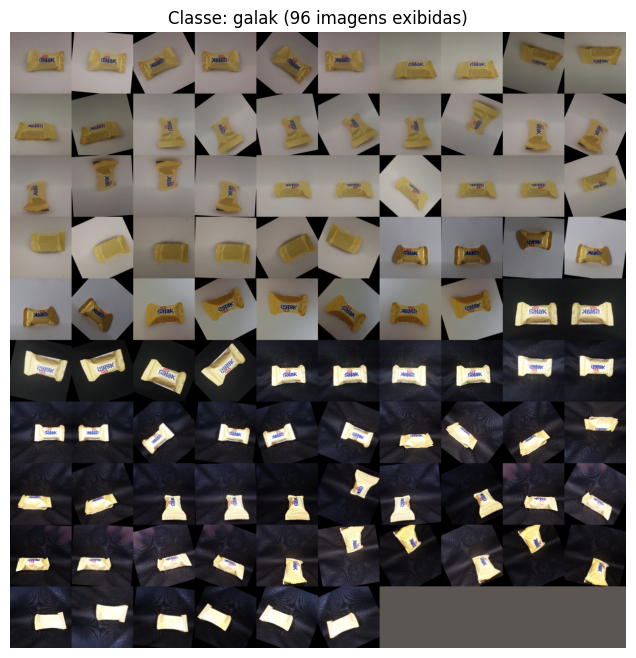

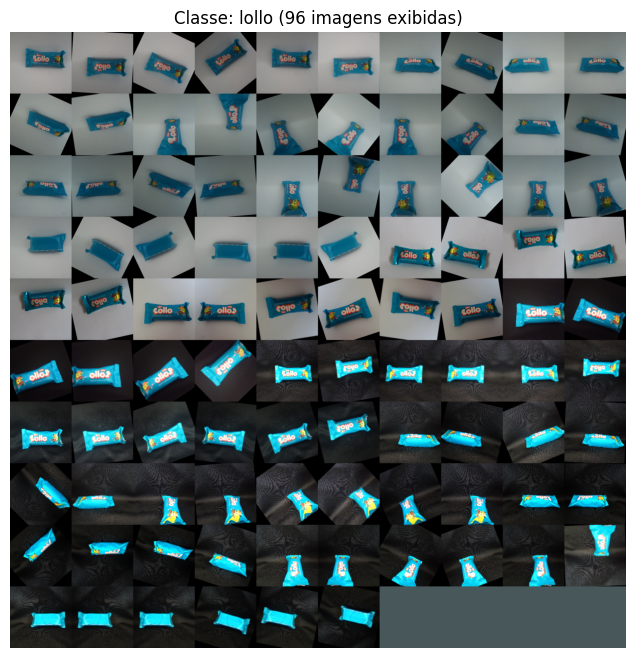

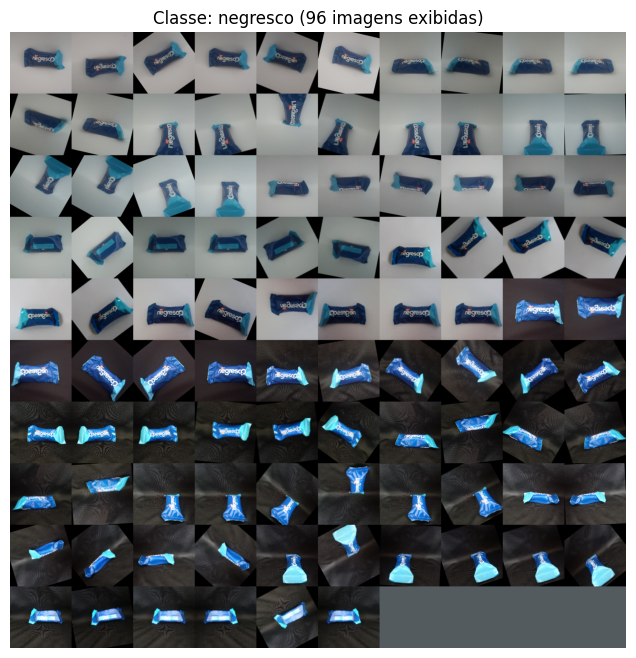

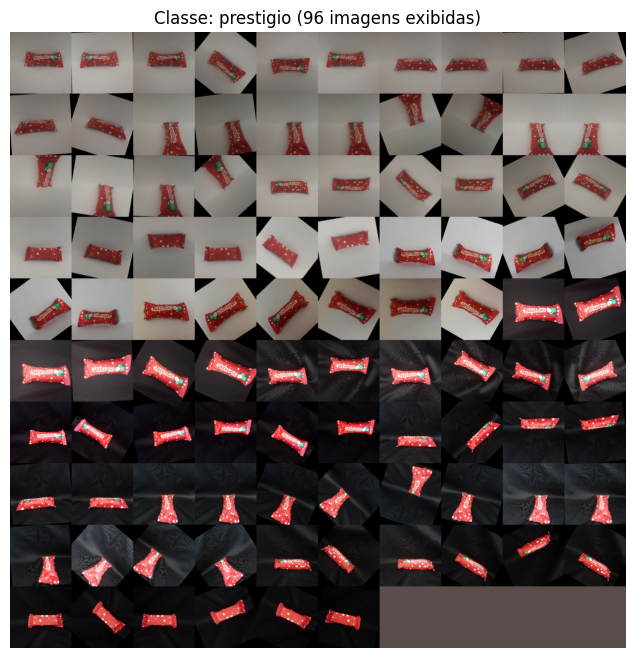

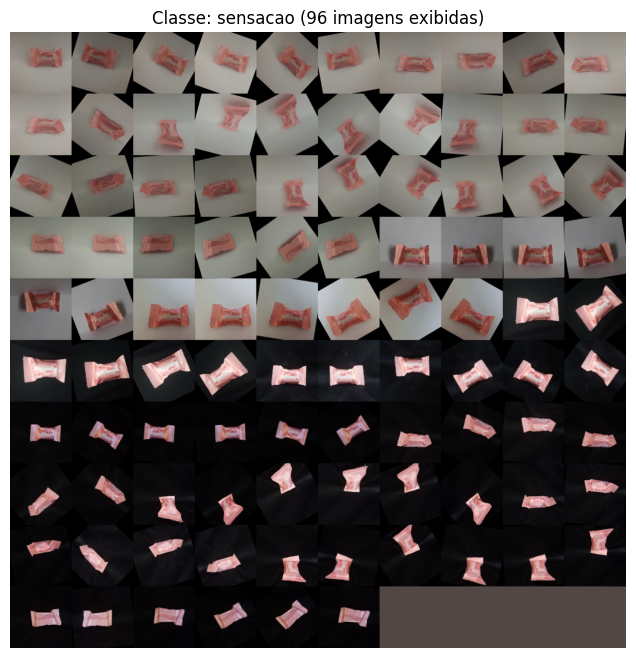

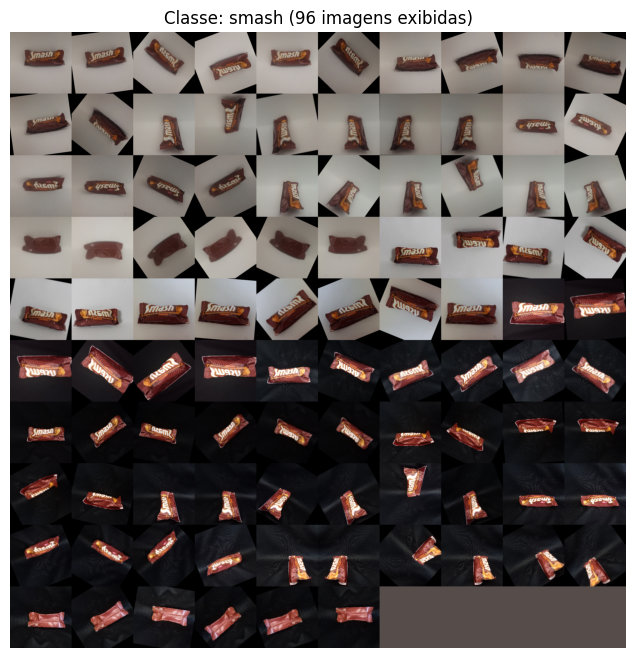

In [13]:
for class_folder in sorted(os.listdir(pasta_entrada)):
    class_path = os.path.join(pasta_entrada, class_folder)
    if os.path.isdir(class_path):
        show_class_montage(class_folder, n_images=96, n_cols=10)